# Library

In [5]:
import matplotlib.pyplot as plt
import pydicom
import numpy as np
import cv2
import os
import skimage.segmentation as seg

# Function

In [2]:
IMAGES_GRID_WIDTH = 8
IMAGES_GRID_HEIGHT = 7
IMAGE_PATHS = os.listdir("dicom")

def displayImages(w,h,img):
    plt.figure(figsize=(20, 30), dpi= 80, facecolor='w', edgecolor='k')
    for i in range(h):
        for j in range(w):
            if i*w+j < IMAGES_GRID_WIDTH * IMAGES_GRID_HEIGHT:
                plt.subplot(w,h,i*w+j+1)
                plt.axis('off')
                plt.imshow(img[i*w+j], cmap=plt.cm.bone)
    plt.tight_layout()
    plt.show()
def manipulate(img, func):
    ret = []
    for i in img:
        ret.append(func(i))
    return ret

def splitReturns(data):
    ret = [[] for i in range(len(data[0]))]
    for i in data:
        for j in range(len(i)):
            ret[j].append(i[j])
    return ret
def loadDicomImg(path):
    img = np.array(pydicom.read_file(path).pixel_array / 2**4).astype(np.uint8)
    return img


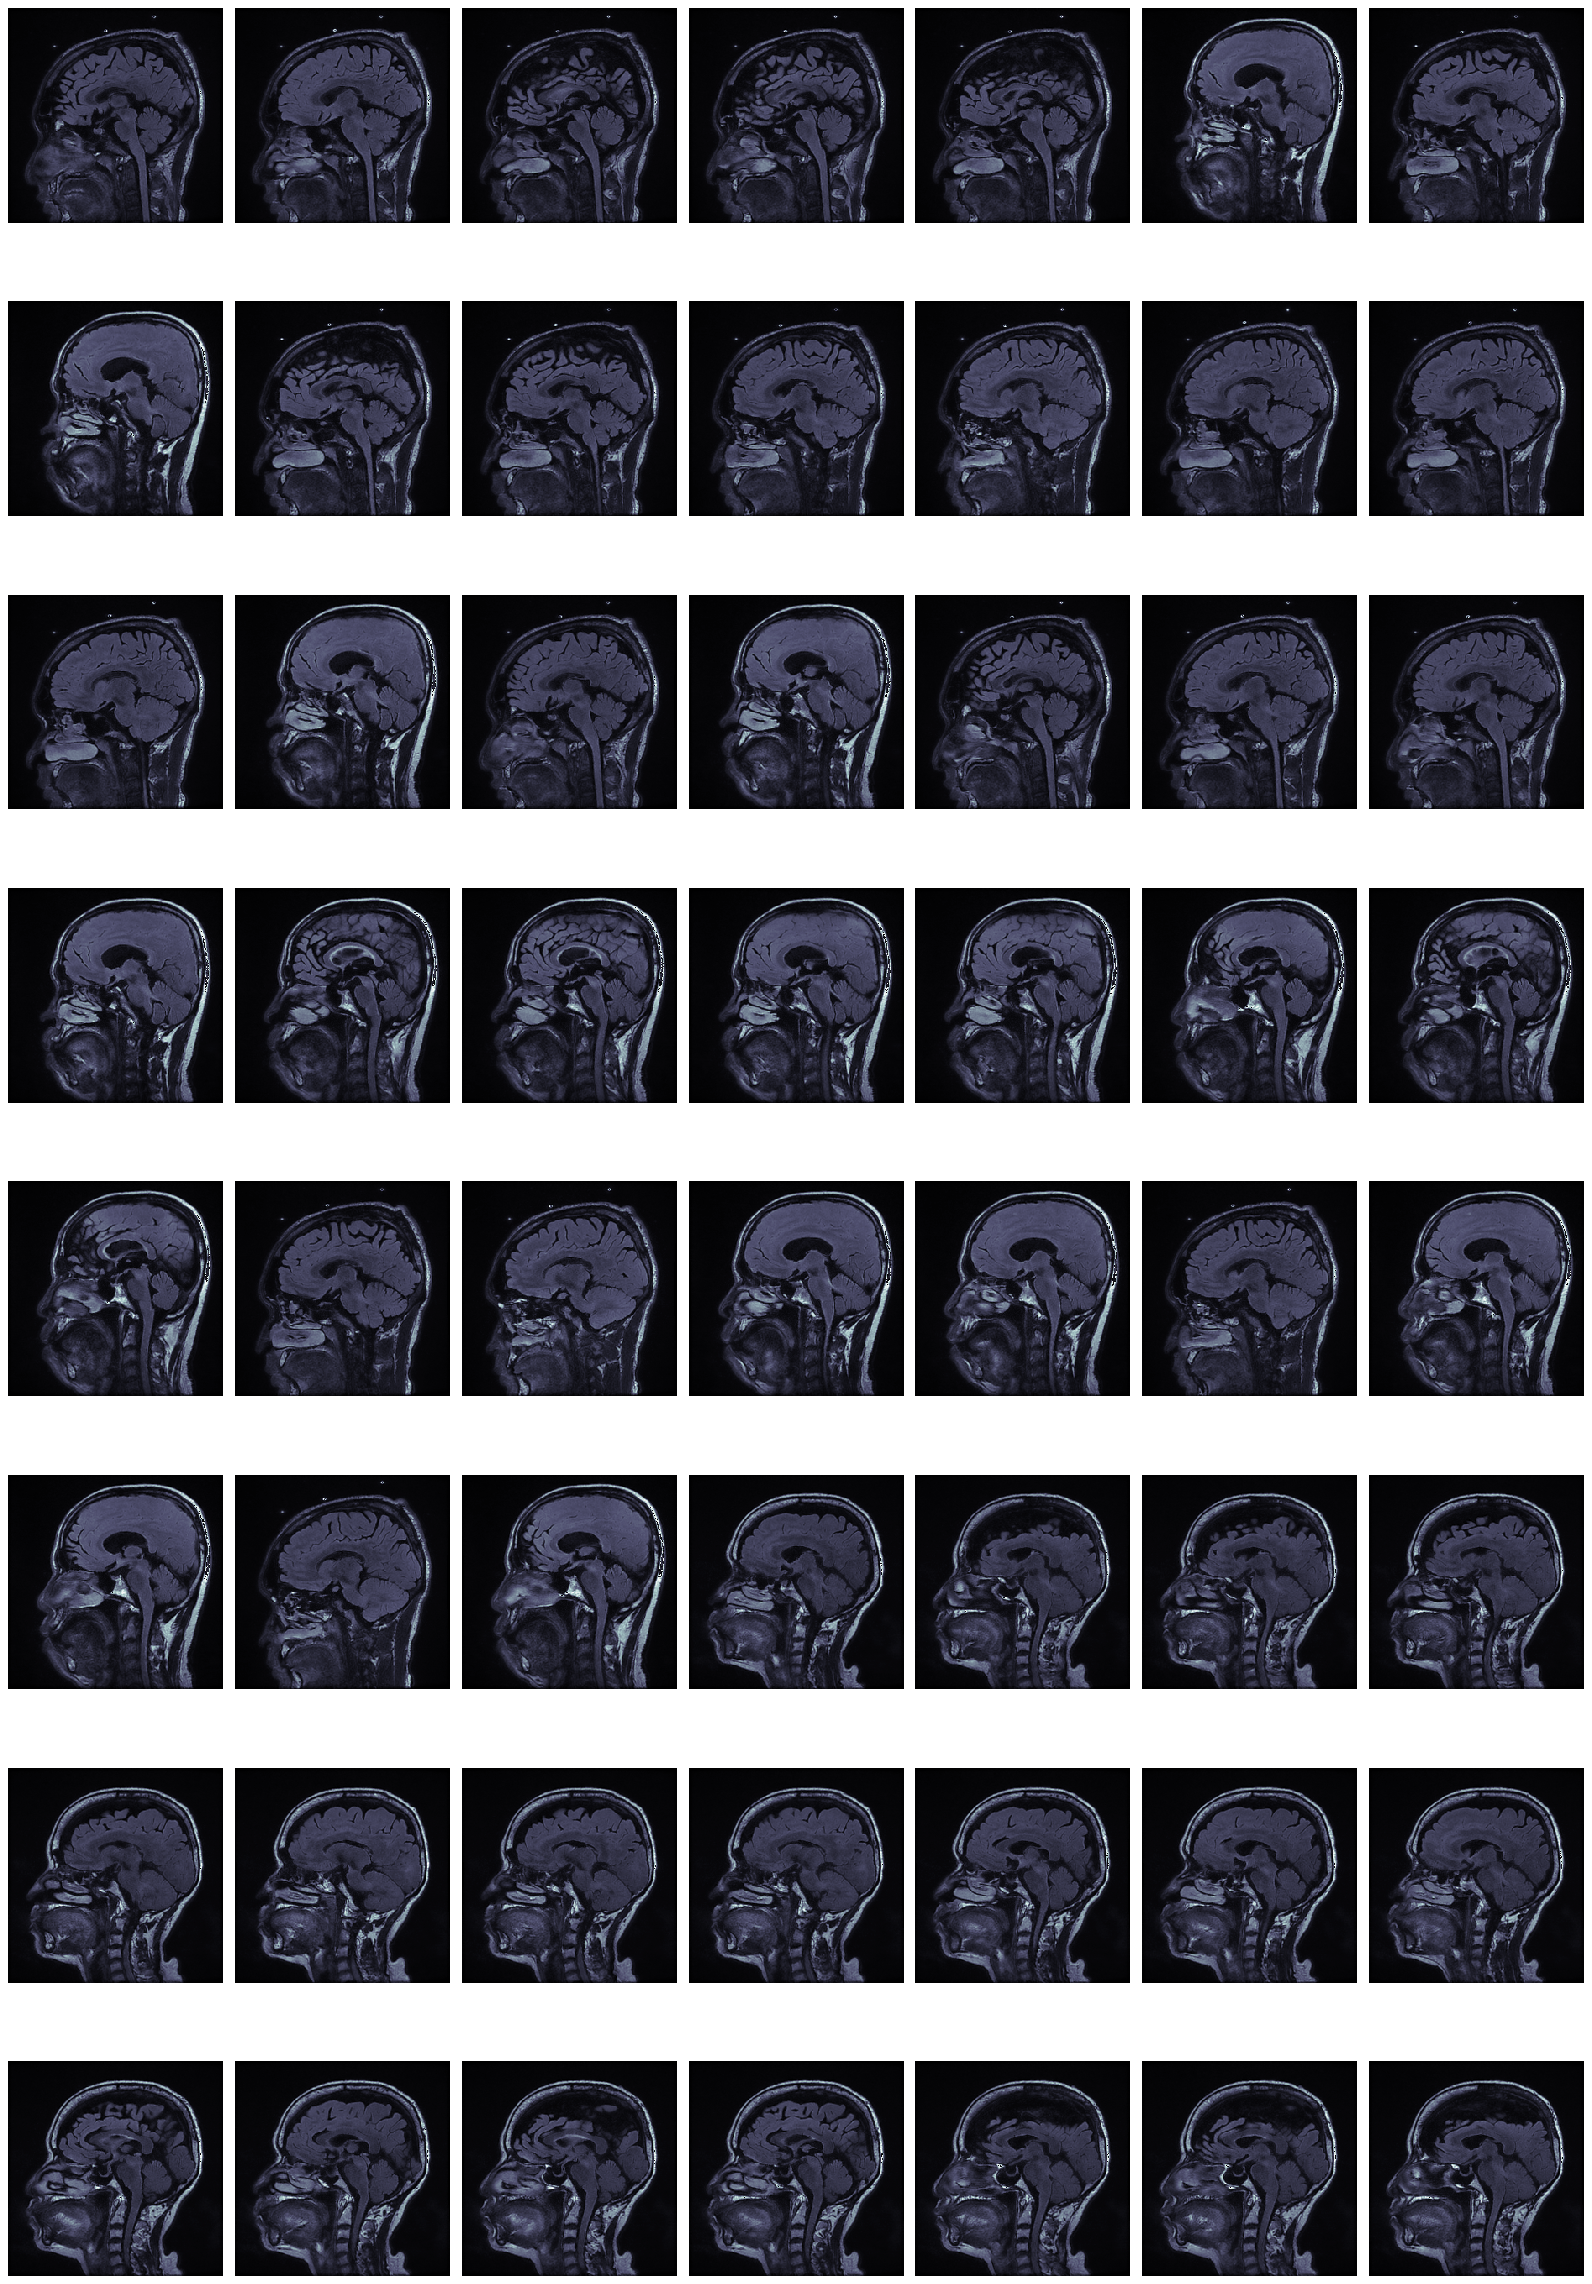

In [3]:
img = []
for i in IMAGE_PATHS:
    img.append(loadDicomImg("DICOM/"+i))
displayImages(IMAGES_GRID_WIDTH,IMAGES_GRID_HEIGHT,img)

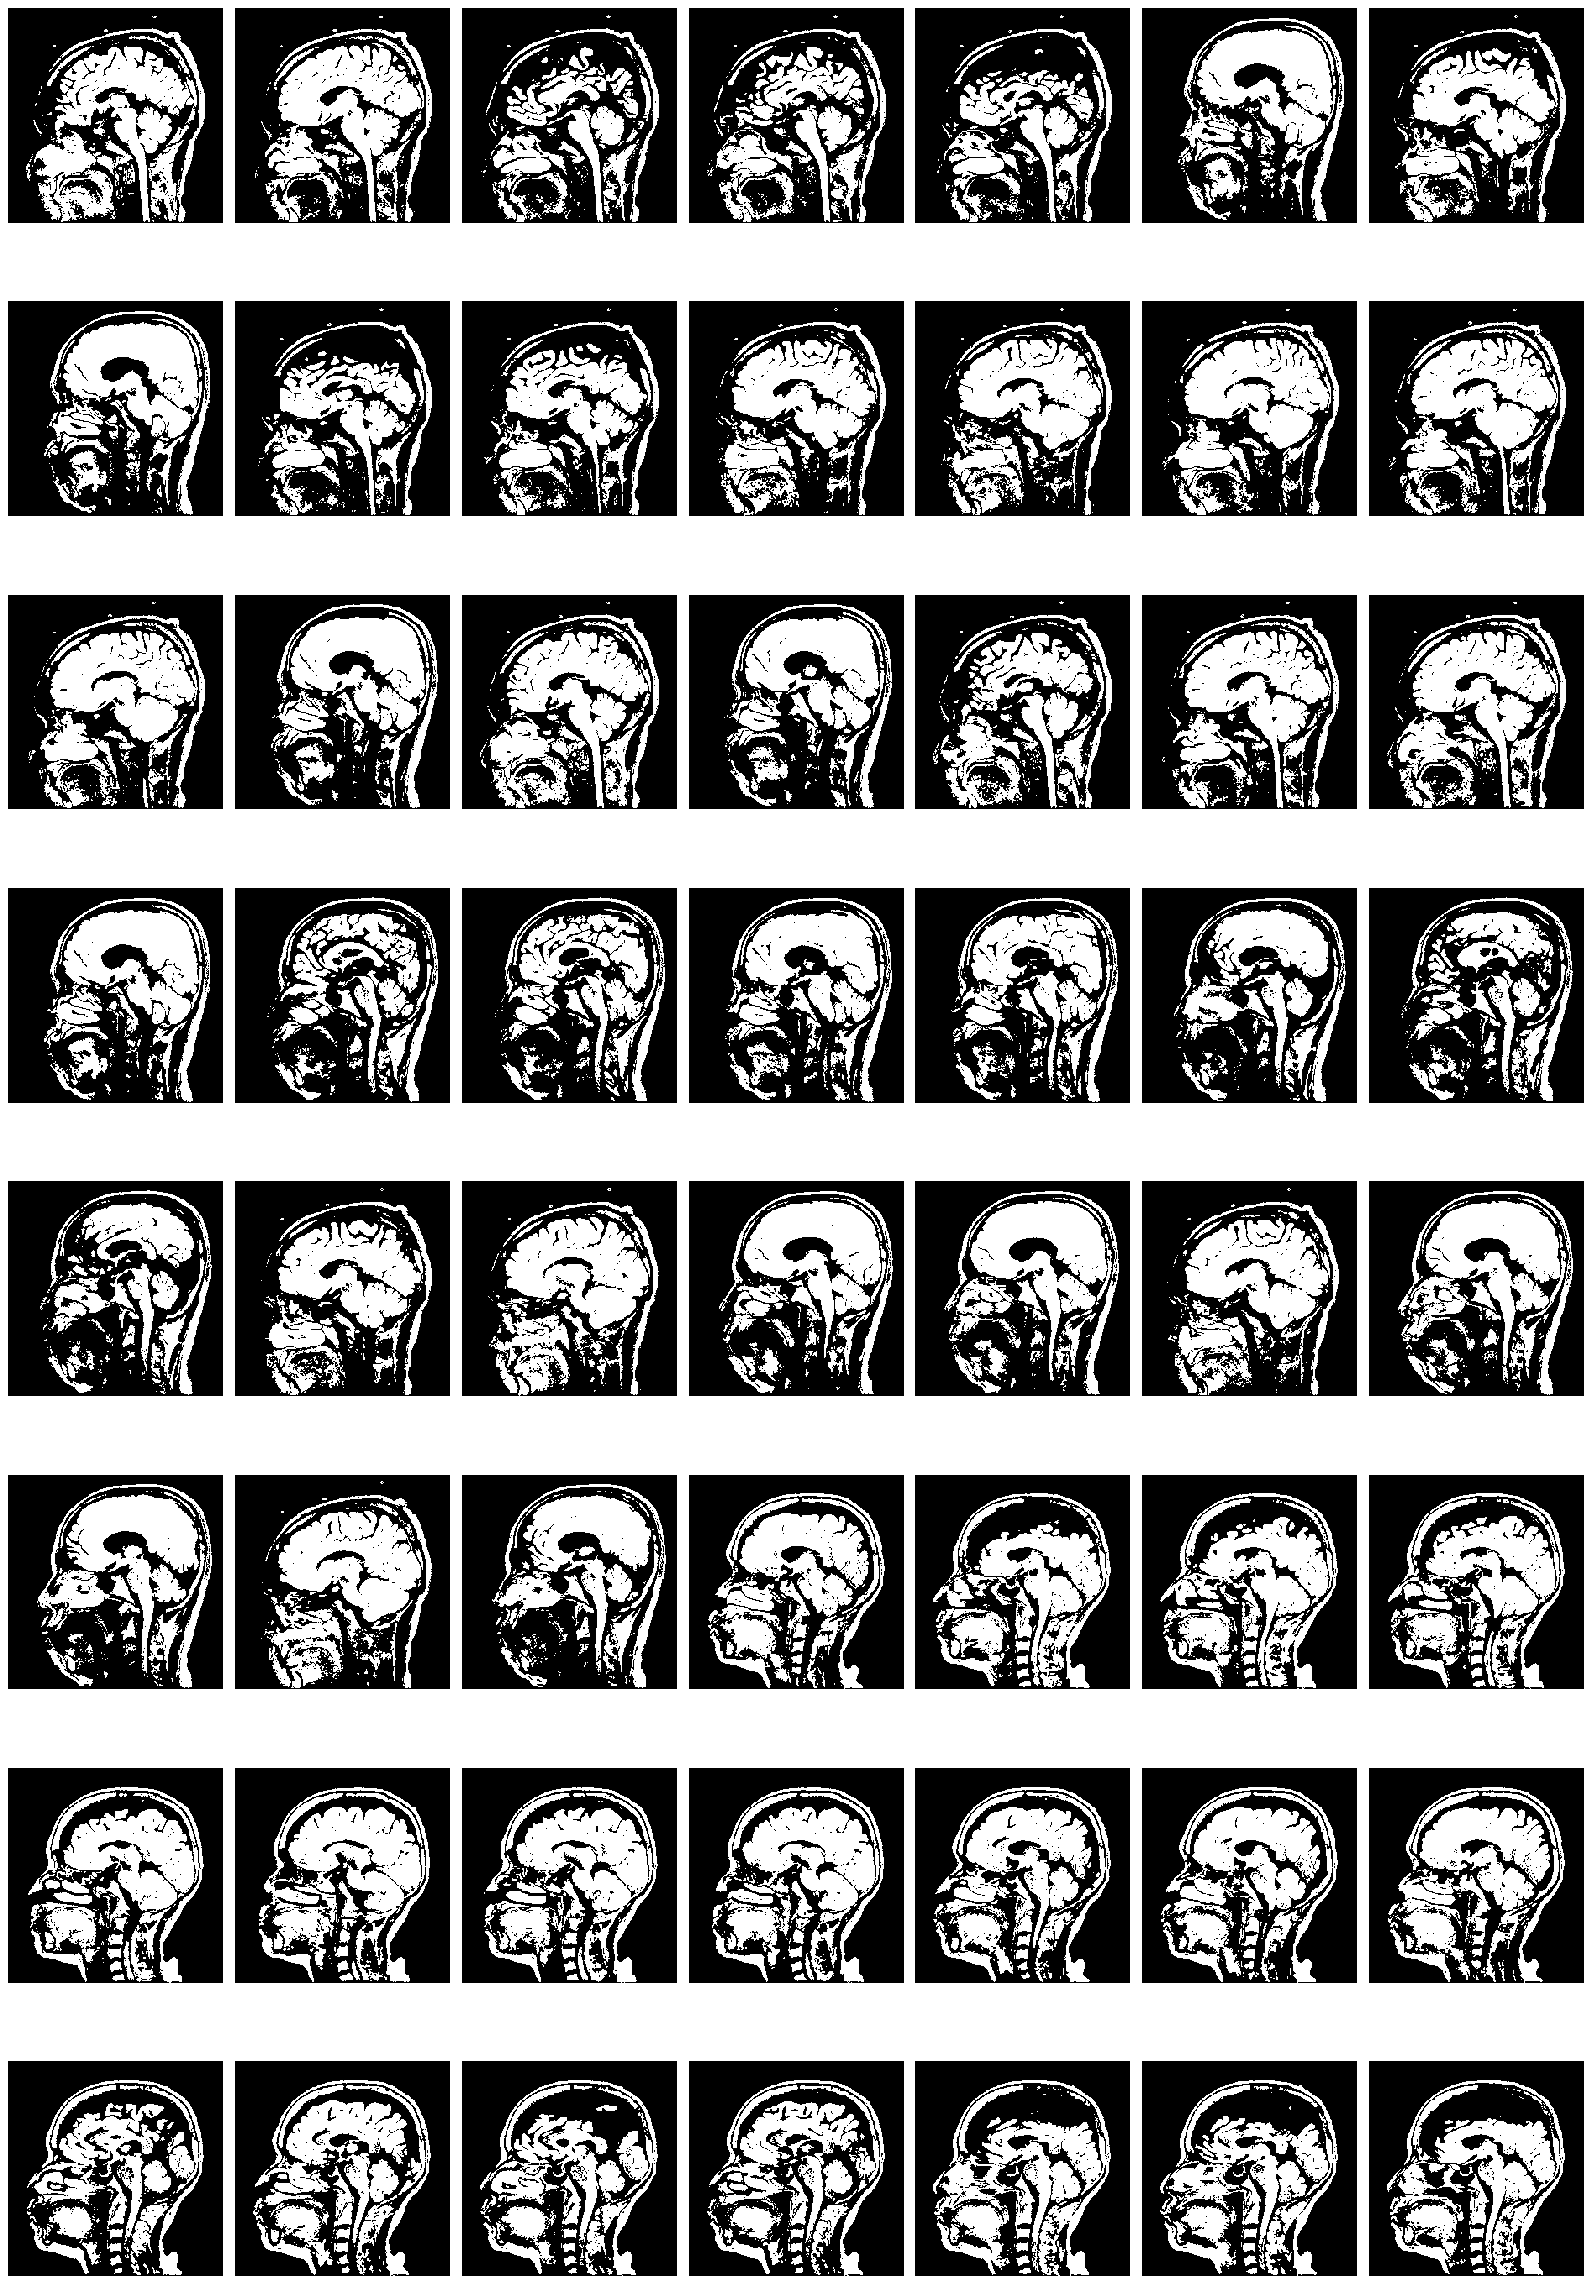

In [42]:
otsu = manipulate(img, lambda x:cv.threshold(x,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1])
displayImages(IMAGES_GRID_WIDTH,IMAGES_GRID_HEIGHT,otsu)